In [3]:
def adjust_mmse(value):
    integer_part = int(value)  # Phần nguyên
    decimal_part = value - integer_part  # Phần thập phân
    
    if decimal_part > 0.6:
        integer_part += 1  # Cộng thêm 1 vào phần nguyên nếu phần thập phân > 0.6
    
    return integer_part

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import xgboost as xgb
import matplotlib.pyplot as plt
df=pd.read_csv(r'D:\Python\python_work\AI_machine learning\alzheimers_disease_data.csv')
df['MMSE'] = df['MMSE'].apply(adjust_mmse)
print(df.columns)
y=df['Diagnosis']

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')


In [7]:
print(df.isnull().sum())

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [11]:
print(df.describe)

<bound method NDFrame.describe of       PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0          4751   73       0          0               2  22.927749        0   
1          4752   89       0          0               0  26.827681        0   
2          4753   73       0          3               1  17.795882        0   
3          4754   74       1          0               1  33.800817        1   
4          4755   89       0          0               0  20.716974        0   
...         ...  ...     ...        ...             ...        ...      ...   
2144       6895   61       0          0               1  39.121757        0   
2145       6896   75       0          0               2  17.857903        0   
2146       6897   77       0          0               1  15.476479        0   
2147       6898   78       1          3               1  15.299911        0   
2148       6899   72       0          0               2  33.289738        0   

      AlcoholCons

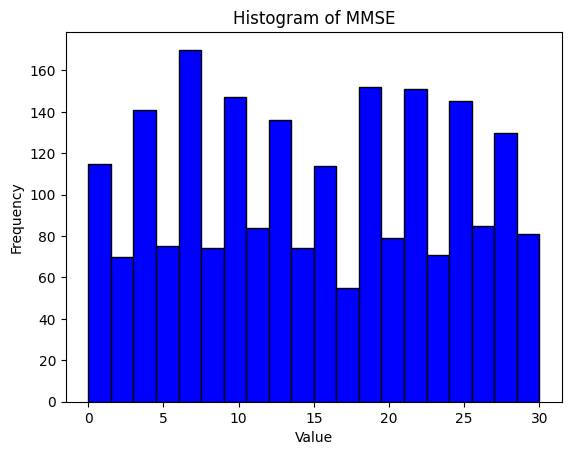

In [43]:
plt.hist(df['MMSE'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of MMSE')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

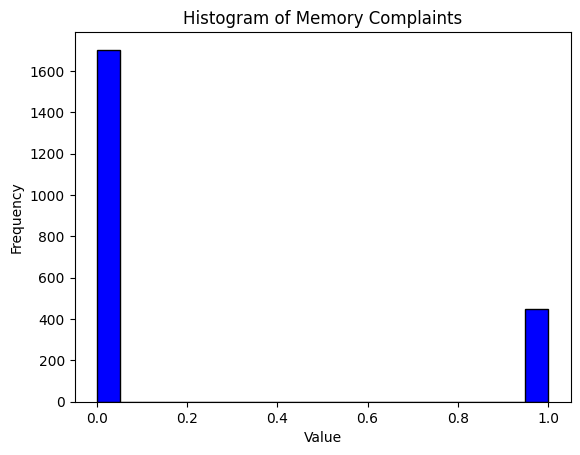

In [25]:
plt.hist(df['MemoryComplaints'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Memory Complaints')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

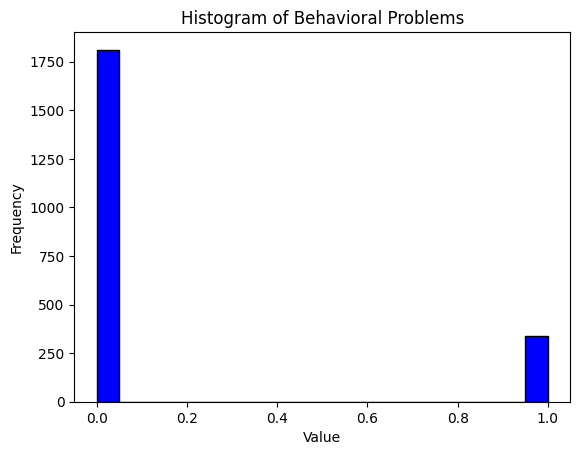

In [23]:
plt.hist(df['BehavioralProblems'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Behavioral Problems')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

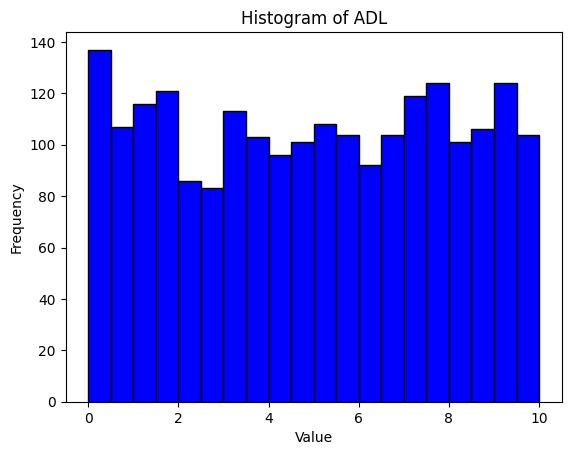

In [44]:
plt.hist(df['ADL'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of ADL')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.hist(df[''], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of ADL')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

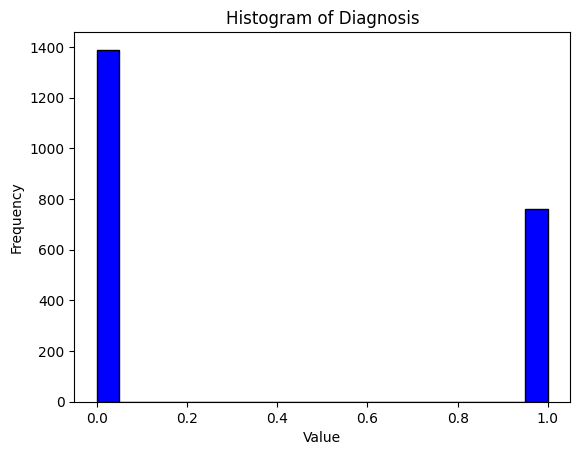

In [24]:
plt.hist(df['Diagnosis'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Diagnosis')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

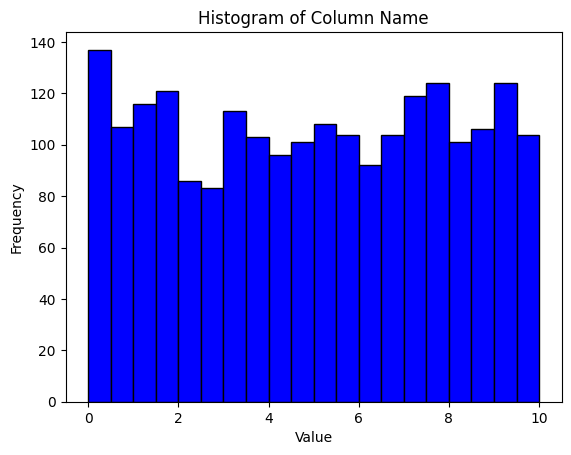

In [15]:
plt.hist(df['ADL'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Column Name')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

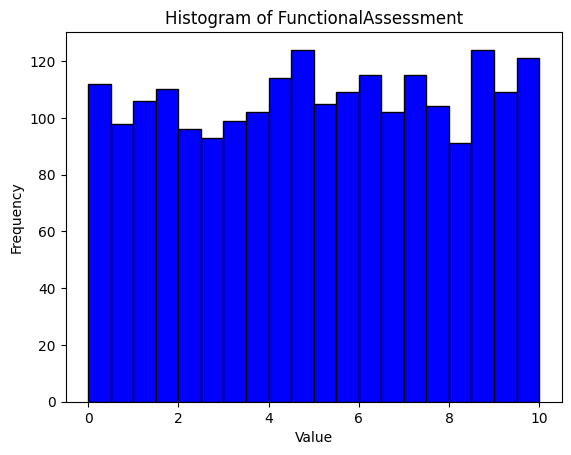

In [45]:
plt.hist(df['FunctionalAssessment'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of FunctionalAssessment')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:

from sklearn.ensemble import RandomForestClassifier
cat_columns=['PatientID','Ethnicity','DoctorInCharge','Diagnosis']
new_df=df.drop(cat_columns,axis=1)
X_df=new_df = pd.DataFrame(new_df)
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_df, y)
feature_importance = rf.feature_importances_

# Tạo DataFrame để dễ dàng đọc kết quả
importance_df = pd.DataFrame({
    'Feature': X_df.columns,
    'Importance': feature_importance
})

# Sắp xếp và hiển thị kết quả
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


                      Feature  Importance
22       FunctionalAssessment    0.190598
25                        ADL    0.167770
21                       MMSE    0.121221
23           MemoryComplaints    0.087263
24         BehavioralProblems    0.051010
7                 DietQuality    0.031132
19             CholesterolHDL    0.030589
3                         BMI    0.030149
20   CholesterolTriglycerides    0.029844
8                SleepQuality    0.029625
5          AlcoholConsumption    0.028640
18             CholesterolLDL    0.028065
17           CholesterolTotal    0.027507
16                DiastolicBP    0.024625
0                         Age    0.024240
15                 SystolicBP    0.023796
6            PhysicalActivity    0.018183
2              EducationLevel    0.009888
1                      Gender    0.004372
14               Hypertension    0.004010
10      CardiovascularDisease    0.003865
4                     Smoking    0.003858
30              Forgetfulness    0

In [62]:
import joblib
X=df[['MMSE','FunctionalAssessment','MemoryComplaints','BehavioralProblems','ADL']]
# Giả sử bạn đã có dữ liệu X và y
# X, y = ...

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Khởi tạo và huấn luyện mô hình XGBoost
xgb_model = XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'alpha': [0, 0.1, 0.5, 1],  
    'reg_lambda': [0, 1, 5, 10] 
}

# Khởi tạo GridSearchCV
grid_search_xg = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Huấn luyện mô hình và tìm siêu tham số tối ưu
grid_search_xg.fit(X_train, y_train)

# In kết quả
print(f'Best parameters: {grid_search_xg.best_params_}')
print(f'Best score: {grid_search_xg.best_score_}')

# Dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = grid_search_xg.best_estimator_.predict(X_train)
y_test_pred_xg = grid_search_xg.best_estimator_.predict(X_test)

# Tính độ chính xác
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred_xg)
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Cross-validation accuracy
cross_val_score_results = cross_val_score(grid_search_xgbest_estimator_, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation Accuracy: {cross_val_score_results.mean():.4f} +/- {cross_val_score_results.std():.4f}')

# Lưu mô hình tốt nhất
joblib.dump(grid_search_xg.best_estimator_, 'alzheimers_model.pkl')
print("Mô hình đã được lưu vào tệp 'alzheimers_model.pkl'")

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best parameters: {'alpha': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'reg_lambda': 1}
Best score: 0.9514551495016612
Train Accuracy: 0.9601
Test Accuracy: 0.9411


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\s

NameError: name 'grid_search_xgbest_estimator_' is not defined

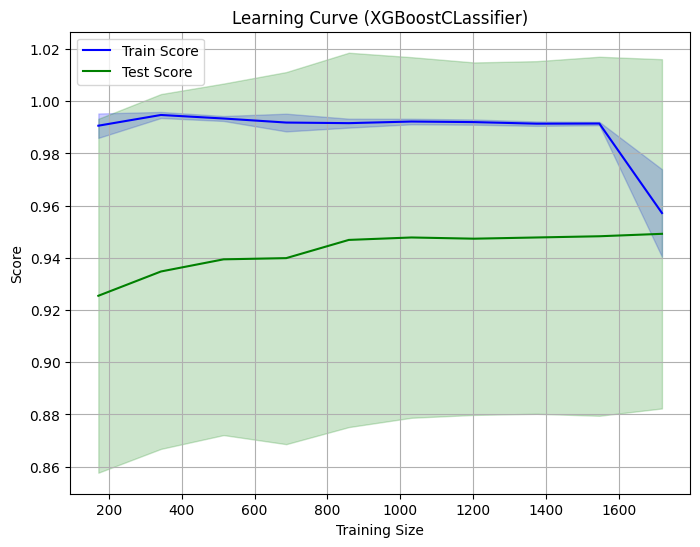

In [ ]:
from sklearn.model_selection import learning_curve
# Tính toán learning curve
train_sizes, train_scores, test_scores = learning_curve(grid_search_xg.best_estimator_, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Tính toán độ lệch chuẩn và điểm trung bình
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Vẽ đồ thị learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Train Score", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Test Score", color="green")

# Thêm độ lệch chuẩn (std)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="green", alpha=0.2)

# Thêm các nhãn và tiêu đề
plt.title('Learning Curve (XGBoostCLassifier)')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid(True)
plt.show()

AUC Score: 1.00


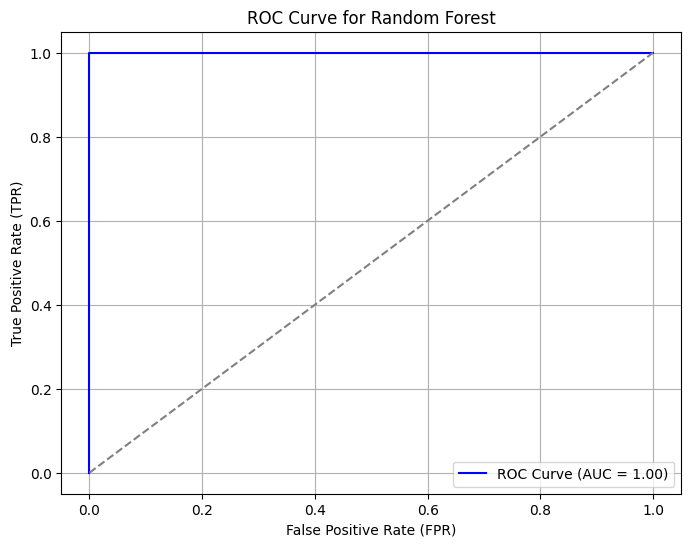

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Tính FPR, TPR và ngưỡng
y_test_pred_xg_proba= grid_search_xg.best_estimator_.predict_proba( X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_pred_xg, y_test_pred_xg_proba)

# Tính AUC (Area Under the Curve)
auc_score = roc_auc_score(y_test_pred_xg, y_test_pred_xg_proba)
print(f"AUC Score: {auc_score:.2f}")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Đường tham chiếu
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [48]:
from sklearn.linear_model import LogisticRegression

# Xây dựng mô hình Logistic Regression với L1 hoặc L2 regularization
logreg_model = LogisticRegression(solver='liblinear')  # 'liblinear' hỗ trợ L1 và L2

# Định nghĩa các tham số cho GridSearch
param_grid = {
    'penalty': ['l1', 'l2'],  # L1 hoặc L2 regularization
    'C': [0.1, 1, 10],  # Hệ số điều chỉnh độ mạnh của regularization
    'max_iter': [100, 200]  # Số lần lặp tối đa
}

# Khởi tạo GridSearchCV với Logistic Regression
grid_search_lg = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Huấn luyện mô hình
grid_search_lg.fit(X_train, y_train)

# Dự đoán trên dữ liệu huấn luyện và kiểm tra
y_train_pred = grid_search_lg.best_estimator_.predict(X_train)
y_test_pred = grid_search_lg.best_estimator_.predict(X_test)

# Tính toán độ chính xác
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Đánh giá Cross-validation
cross_val_score_results = cross_val_score(grid_search_lg.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation Accuracy: {cross_val_score_results.mean():.4f} +/- {cross_val_score_results.std():.4f}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Train Accuracy: 0.8557
Test Accuracy: 0.8264
Cross-validation Accuracy: 0.8530 +/- 0.0334


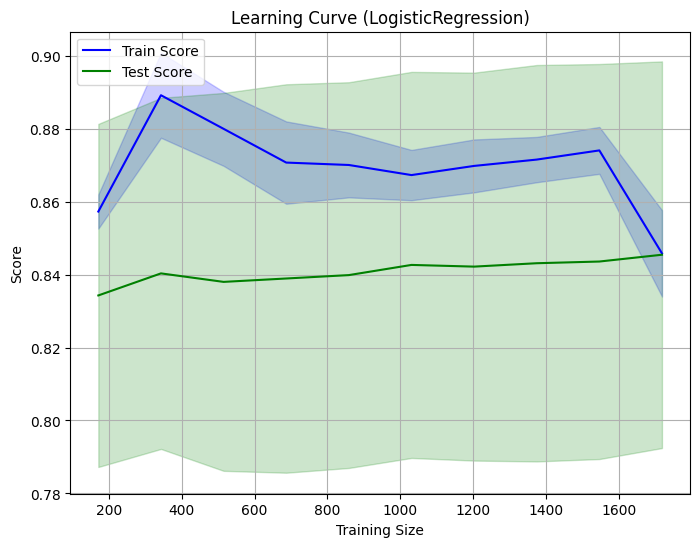

In [49]:
from sklearn.model_selection import learning_curve
# Tính toán learning curve
train_sizes, train_scores, test_scores = learning_curve(grid_search_lg.best_estimator_, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Tính toán độ lệch chuẩn và điểm trung bình
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Vẽ đồ thị learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Train Score", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Test Score", color="green")

# Thêm độ lệch chuẩn (std)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="green", alpha=0.2)

# Thêm các nhãn và tiêu đề
plt.title('Learning Curve (LogisticRegression)')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_model=model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2], 
    'max_samples': [0.5, 0.8, 1.0],          
    'bootstrap': [True],                     
    'min_impurity_decrease': [0.0, 0.01, 0.1] 
}

# 3. Khởi tạo GridSearchCV với 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# 4. Tìm kiếm và huấn luyện mô hình
grid_search_rf.fit(X_train, y_train)

y_train_pred = grid_search_rf.best_estimator_.predict(X_train)
y_test_pred = grid_search_rf.best_estimator_.predict(X_test)
y_test_pred_proba=grid_search_rf.predict_proba(X_test)[:, 1]
# Tính toán độ chính xác
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Đánh giá Cross-validation
cross_val_score_results = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation Accuracy: {cross_val_score_results.mean():.4f} +/- {cross_val_score_results.std():.4f}')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Train Accuracy: 0.9608
Test Accuracy: 0.9318
Cross-validation Accuracy: 0.9515 +/- 0.0150


AUC Score: 1.00


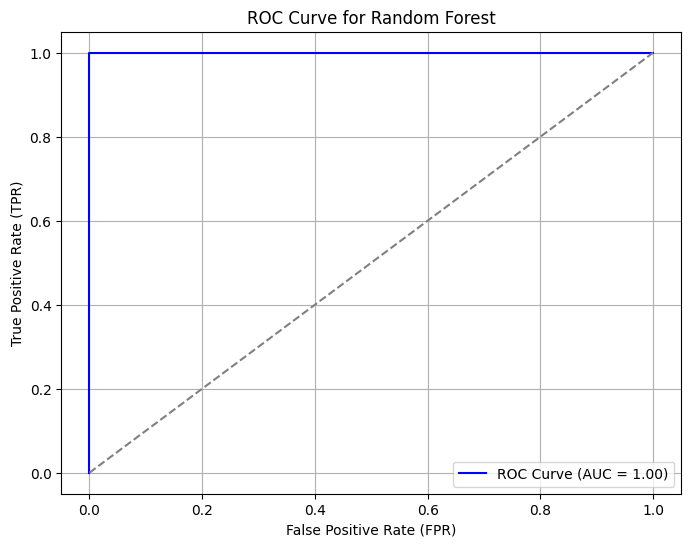

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
# Tính FPR, TPR và ngưỡng
fpr, tpr, thresholds = roc_curve(y_test_pred, y_test_pred_proba)

# Tính AUC (Area Under the Curve)
auc_score = roc_auc_score(y_test_pred, y_test_pred_proba)
print(f"AUC Score: {auc_score:.2f}")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Đường tham chiếu
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

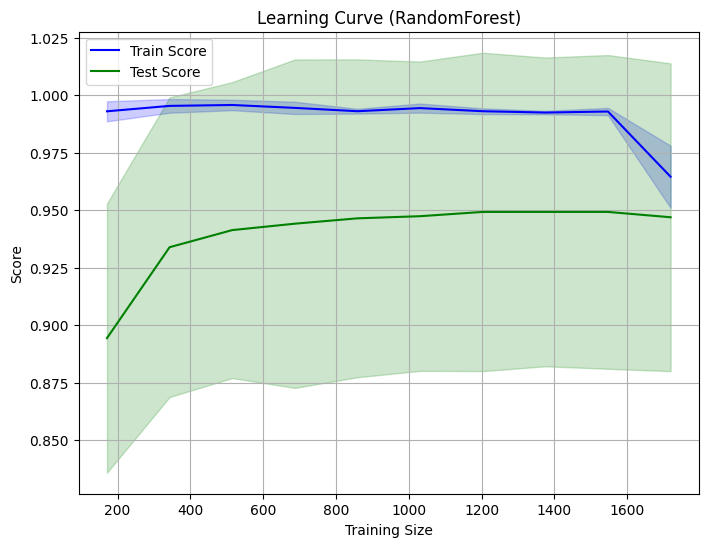

In [50]:
from sklearn.model_selection import learning_curve
# Tính toán learning curve
train_sizes, train_scores, test_scores = learning_curve(grid_search_rf.best_estimator_, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Tính toán độ lệch chuẩn và điểm trung bình
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Vẽ đồ thị learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Train Score", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Test Score", color="green")

# Thêm độ lệch chuẩn (std)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="green", alpha=0.2)

# Thêm các nhãn và tiêu đề
plt.title('Learning Curve (RandomForest)')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [63]:
from sklearn.ensemble import StackingClassifier
base_models = [
    ('logistic', grid_search_lg),
    ('random_forest', grid_search_rf),
    ('xgb', grid_search_xg)
]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)

# Tính accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Stacking Model: {accuracy:.2%}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Accuracy of Stacking Model: 93.80%


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.9601063829787234
